<img src="C:\Users\MXL92\Desktop\enron-logo.jpg">
# Identify Fraud from Enron Email #
## Project Overview ##
In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to sidespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. In this project, I will build a person of interest identifier based on financial and email data made public as a result of the Enron scandal.

## Questions ##
** 1. Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”] **


The goal of this project is to use financial and email data for top executives of Enron, to come up with a predictive model which can effectively classify individuals into "Person of Interest" (POI) and non-POI. The Enron corpus is widely used for various machine learning problem and although it has been labeled already, the potential application for similar cases in other companies or spam filtering application is still the value of it. Here is the summary of the data:

* Total number of data points: 146
* Total number of poi: 18
* Total number of non-poi: 128

There are 21 features for each person in the dataset, and 20 features are used.

However, the dataset contains numerous missing value for each feature as below:

|Feature |NaN per Feature|
|:-------|:--------------|
|salary  |51             |
|to_messages|60          |
|deferral_payments|107   |
|total_payments|21       |
|loan_advances|142       |
|bonus        |64        |
|email_address|35        |
|restricted_stock_deferred|128|
|total_stock_value|20    |
|shared_receipt_with_poi|60|
|long_term_incentive|80  |
|exercised_stock_options|44|
|from_messages|60        |
|other        |53        |
|from_poi_to_this_person|60|
|from_this_person_to_poi|60|
|deferred_income|97     |
|expenses       |51     |
|restricted_stock|36    |
|director_fees   |129   |

In this project, scikit-learn and machine learning techniques is used to predict "Person of Interest". After looking at the scatter plot, we can see that the Enron data contains 1 outlier "TOTAL", it should comprised every financial data in. And "THE TRAVEL AGENCY IN THE PARK" is removed too because this may be a data entry error that it represents an agency not an individual. "LOCKHART EUGENE E" is removed because this record contained only NaN.

** 2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”] **

In this project I use ```VarianceThreshold``` to remove all features with variances below 80%, after comparing the result without removing low variance features and several threshold values. Initial feature selection was performed using SelectKBest univariate statistical tests and identifying features with the highest k scores. After sorting and several trails, base on the testing results I select the 7 highest scored features as my best features to use in the POI identifier. Below are these 7 features and their score:
```
[('exercised_stock_options', 24.815079733218194), 
 ('total_stock_value', 24.182898678566879), 
 ('bonus', 20.792252047181535), 
 ('salary', 18.289684043404513), 
 ('deferred_income', 11.458476579280369), 
 ('long_term_incentive', 9.9221860131898225), 
 ('restricted_stock', 9.2128106219771002)]
 ```
The trend chart of accuracy, precision and recall versus number of k-best features as below. Although accuracy is the most intuitive performance measure, we still need other parameters to evaluate the performance of the model since accuracy only works well when we have symmetric datasets where values of false positive and false negatives are almost the same. Here precision and recall are measured also. The potimal resutl is to obtain high recall with high precision. From below chart I decided to select the 7 highest scored features as my best features.

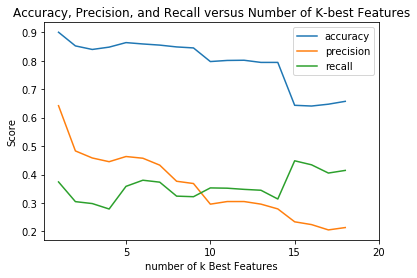

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
 
num_of_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
accuracy = [0.9, 0.852, 0.8395, 0.8477, 0.8636, 0.8588, 0.8548, 0.8484, 0.8449, 0.7970, 0.8009, 0.8016, 0.7940, 0.7940, 0.6433, 0.6407, 0.6472, 0.6572]
precision = [0.64183, 0.483, 0.4582, 0.4451, 0.4633, 0.4573, 0.4330, 0.3764, 0.3684, 0.2959, 0.3051, 0.3051, 0.2960, 0.2792, 0.2339, 0.2241, 0.2054, 0.2137]
recall = [0.374, 0.3048, 0.2980, 0.2789, 0.3585, 0.3800, 0.3732, 0.3241, 0.3221, 0.3530, 0.3520, 0.3479, 0.3448, 0.3140, 0.4483, 0.4342, 0.4052, 0.4145]

plt.plot(num_of_features, accuracy, '-', label = 'accuracy')
plt.plot(num_of_features, precision, '-', label = 'precision')
plt.plot(num_of_features, recall, '-', label = 'recall')
plt.title("Accuracy, Precision, and Recall versus Number of K-best Features")
plt.xticks([5, 10, 15, 20])
plt.xlabel("number of k Best Features")
plt.ylabel("Score")
plt.legend()
plt.show()

 I have tried to engineer 2 features 'msg_to_poi_ratio' and 'msg_from_poi_ratio', and 'msg_to_poi_ratio' refers to the ratio that the person sends emails to POI, 'msg_from_poi_ratio' refers to the ratio that the person receives emails from POI. Because I think that POIs are more likely to mail each other so that these two features could be used to predict POI. But from the feature select process things didn't show as I thought. I tried with the new features also to see how naive bayse model performs (naive bayse is the best model in this case) and we can see from next tabel the performance with new festures is not as good as the performance that without these two features.
 
 |Metrics|Without New Features|With New Features|
 |:------|:-------------------|:----------------|
 |accuracy|0.855              |0.843            |
 |precision|0.433             |0.396            |
 |recall  |0.373              |0.374            |
 
After feature engineering and selecting, I did scaling by ```MinMaxScaler``` since the data is widely varies. It is vital to do feature scaling since some machine learning algorithms functions will not work properly without normalization, such as K-means, logistic regression and SVM.

** 3. What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”] **

After trying naive bayes, k-mean, svm and logistic regression, I found naive bayes is the best algorithm in this case. Because it maximize both accuracy, precision and recall from the result below.

|Feature|Accuracy|Precision|Recall|Best Parameter|
|:------|:-------|:--------|:-----|:-------------|
|Naive Bayes|0.855|0.433|0.373| |
|SVM |0.866|0.142|0.038|kernel = 'linear', C = 1, gamma = 1|
|K-Means|0.369|0.760|0.374|tol = 1, n_clusters = 5|
|Logistic Regression|0.860|0.400|0.190|tol = 1, C = 0.1|

** 4. What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]
 **

Parameter tuning refers to the adjustment of the algorithm when traning, to improve the fit of the test set. It is an important step to identify the variable parameters (if applicable) of the algorithm that improves the performance. If the tuning processis not done well, typically we can not achieve the optimal performance results for the particular dataset, features and algorithm, or say it can lead to the model misfitting the data.

In this case, I use ```GridSearchCV```, which can do an exhaustive search over specified parameter values for an estimator.to obtain the best parameters for each algorithm:
* Naive Bayes: no parameter need to specify.
* SVM: kernel is 'linear', C is 1 and gamma is 1.
* K-Means: n_clusters is 5; tol (relative tolerance) is 1, and random_state (use to reproduce and confirm the result by fixing the seed) is 42.
* Logistic Regression: C (inverse regularization) is 0.1; tol (relative tolerance) is 1.

** 5. What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”] **

Validation is the process to make sure our model generalizes with the remaining part of the dataset.A classic mistake I often make is over fitting a model, with the model perfomed well on training set but have substantial lower result on the test set. 

In order to address this problem, I have applied cross validation technique to split the data into training data and test data with 3:1 training-to-test ratio for 100 times, then I used sklearn.metrics accuracy, precision and recall scores to obtain the accuracy, precision and recall of each iteration and took the mean of each metric to validate my algorithms.

The table shows the results of the chosen algorithms:

|Feature|Accuracy|Precision|Recall|
|:------|:-------|:--------|:-----|
|Naive Bayes|0.855|0.433|0.373|
|SVM |0.866|0.142|0.038|
|K-Means|0.369|0.760|0.374|
|Logistic Regression|0.860|0.400|0.190|

** 6. Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”] **

* Accuracy: demonstrates how close a measured value is to the actual (true) value.
* Precision: True Positive / (True Positive + False Positive). Out of all the items labeled as positive, how many truly belong to the positive class.
* Recall: True Positive / (True Positive + False Negative). Out of all the items that are truly positive, how many were correctly classified as positive. Or simply, how many positive items were 'recalled' from the dataset.

The chosen algorithm is Naive Bayes, which resulted in accuracy of 0.855, precision of 0.433 and recall of 0.373.
An accuracy of 0.855 means that the proportion of true results is 0.855. A precision of 0.433 means that among the persons classified as POIs, the proportion of the actual POIs is 0.433. And a recall of 0.373 means that among the true POIs existing in the dataset, the proprotion of the correctly classified POIs is 0.373.

## References ##
* [1] http://scikit-learn.org/stable/documentation.html
* [2] https://www.programiz.com/python-programming/methods/built-in/sorted
* [3] https://docs.python.org/2/library/functions.html
* [4] https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/
* [5] http://scikit-learn.org/stable/modules/cross_validation.html